<a href="https://colab.research.google.com/github/CarterRKnutson/cactus/blob/notebook_demo_test/CACTUS_Demo_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Welcome to CACTUS!

CACTUS is an innovative tool-augmented language model designed to assist researchers and chemists in various chemistry-related tasks. By integrating state-of-the-art language models with a suite of powerful cheminformatics tools, CACTUS provides an intelligent and efficient solution for exploring chemical space, predicting molecular properties, and accelerating drug discovery. Just as the cactus thrives in the harsh desert environment, adapting to limited resources and extreme conditions, CACTUS has been implemented by Pacific Northwest National Laboratory (PNNL) Scientists to navigate the complex landscape of chemical data and extract valuable insights.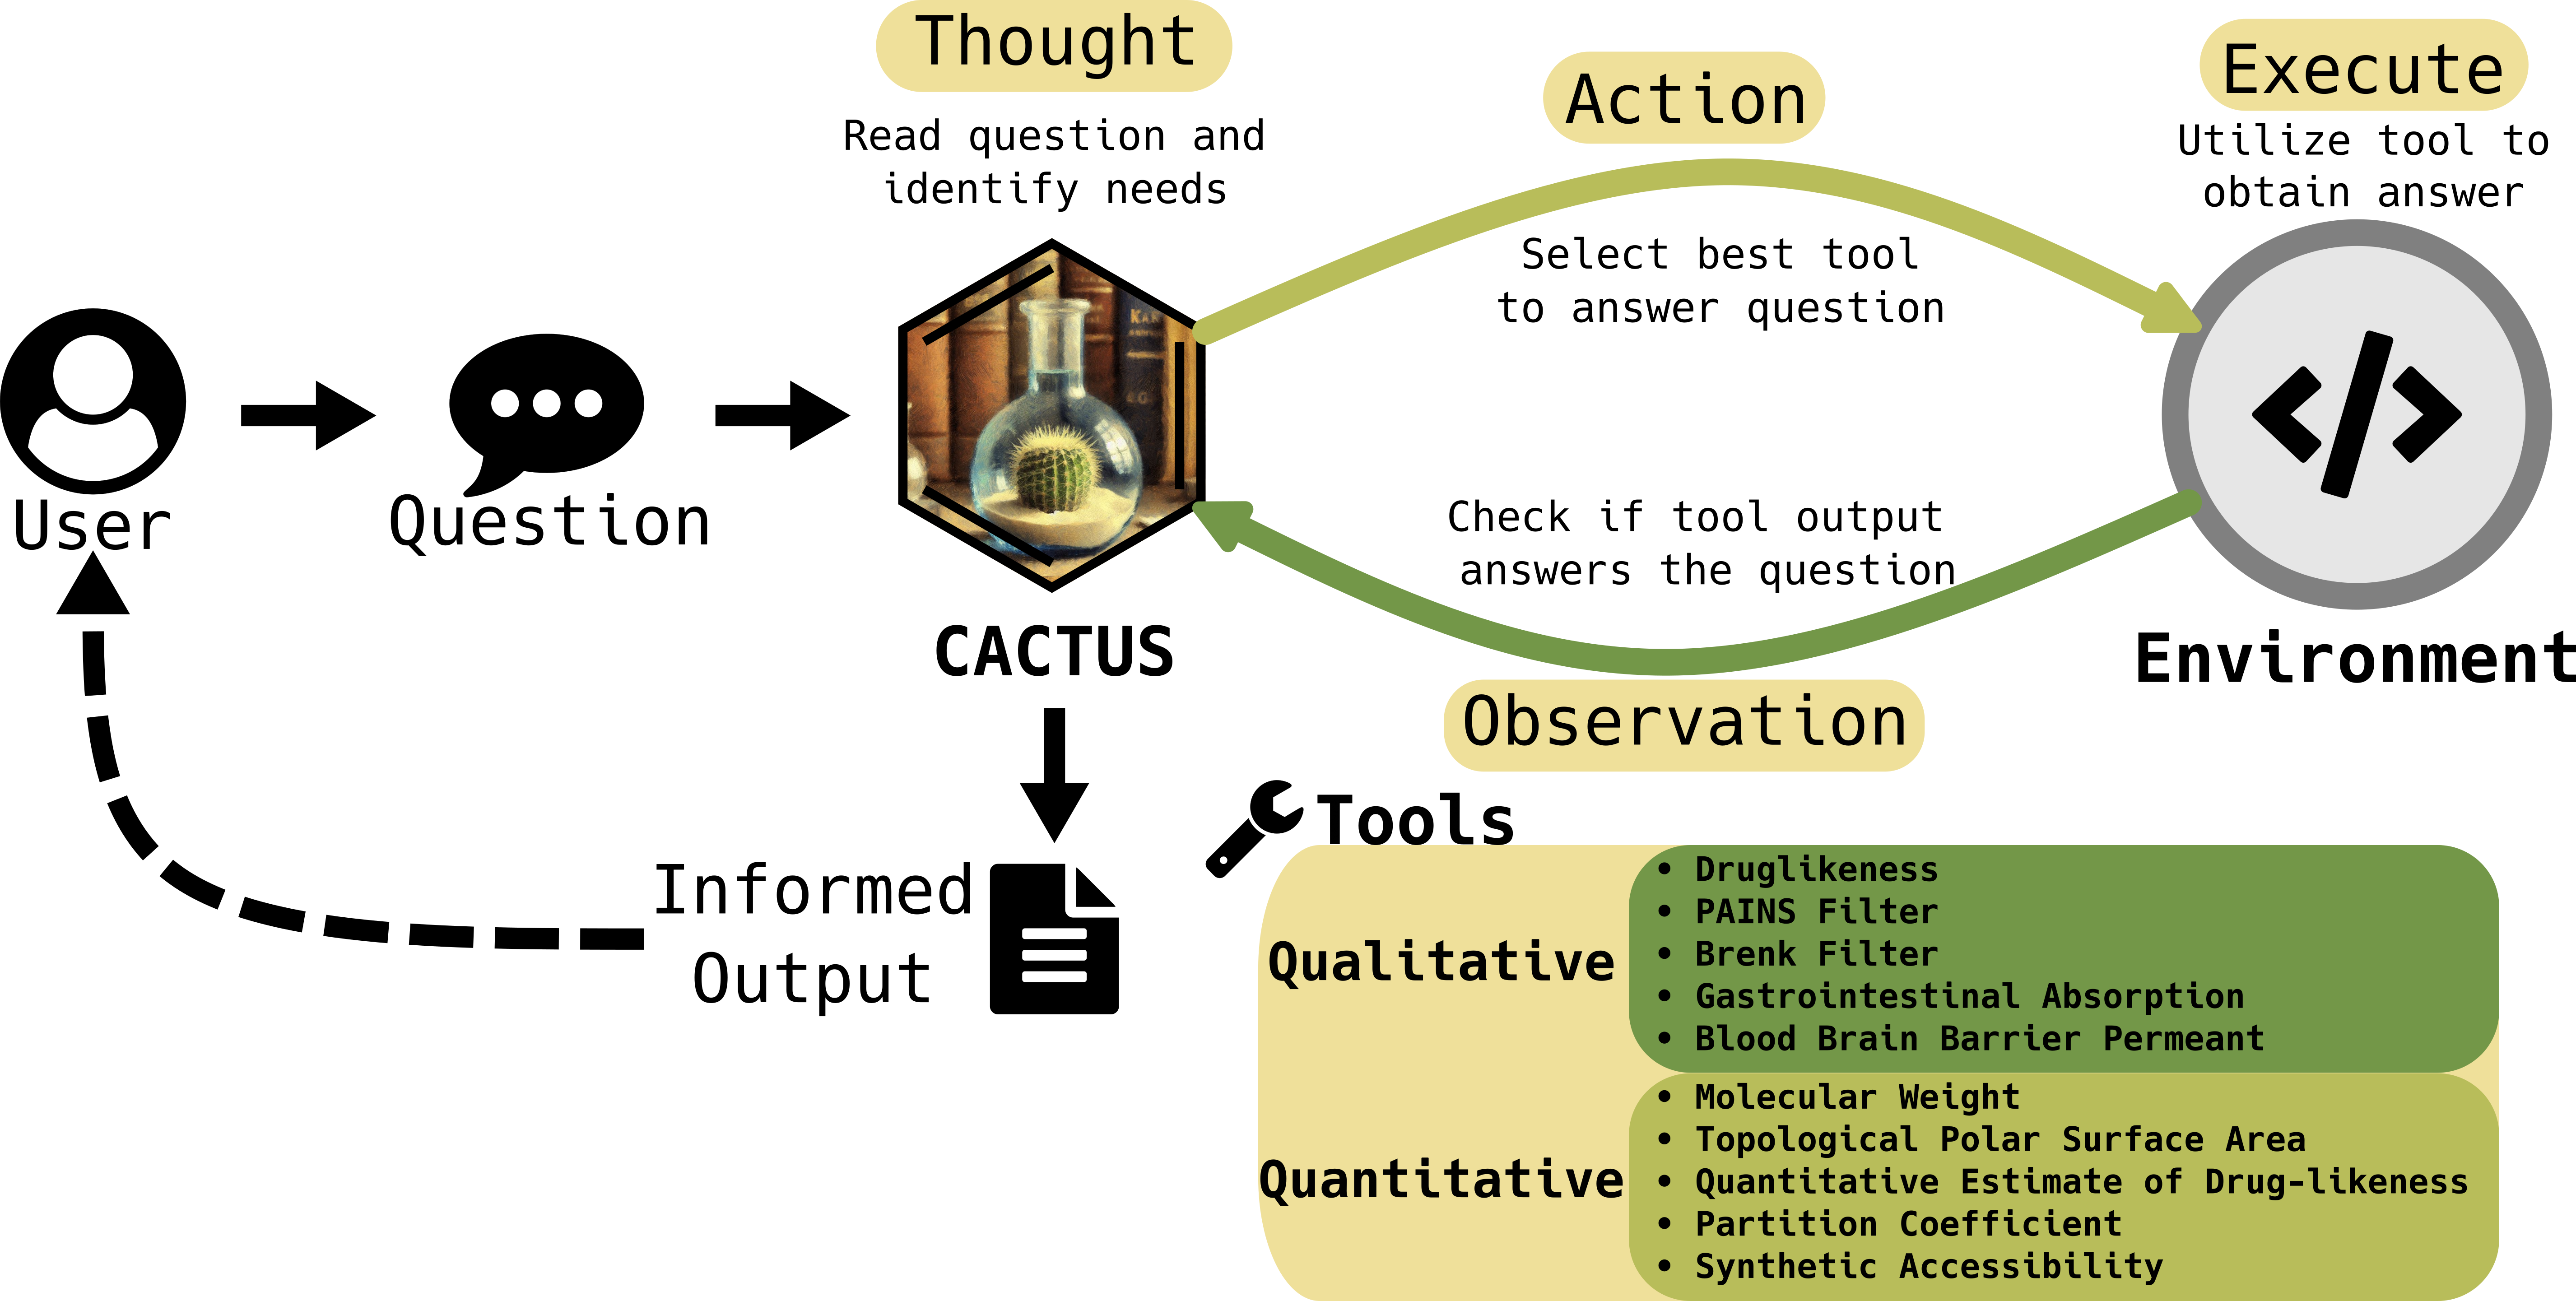

## Available Tools



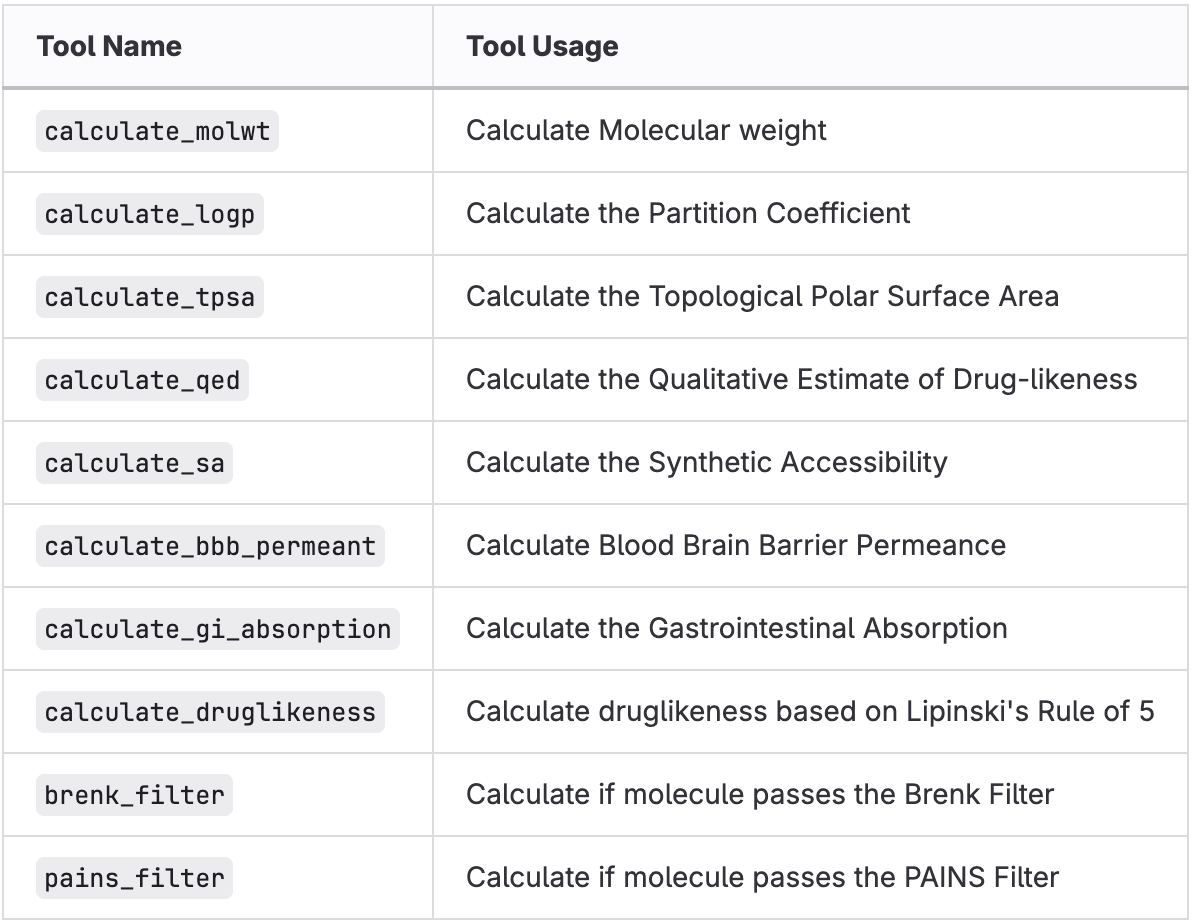

## ❗**Notice: These tools currently expect a SMILES as input, tools for conversion between identifiers are available but not yet working as intended. Fix to come soon.**

# Cactus Set Up

## Adding API Keys

Here is a quick example of adding API keys. This is important to do becasue the install in the next step may take a few moments and needs to be run anytime the colab session is restarted.

Follow this link to receive a gemini-api key:
https://ai.google.dev/gemini-api/docs/api-key

Once you have it, add it to your colab secrets through the menu on the left(as shown below) and restart the session:

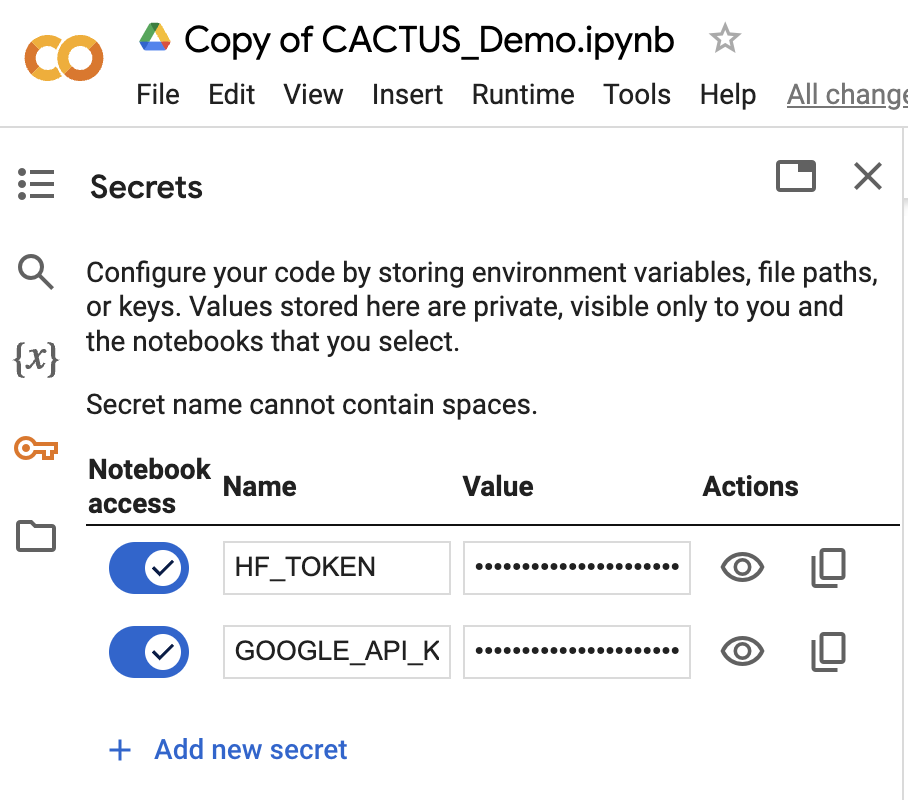

For HuggingFace, make sure that your token allows access to public gated repos under settings and access tokens on your HuggingFace account:

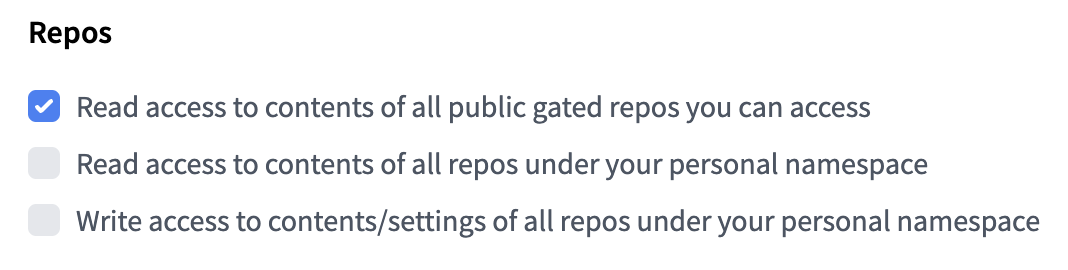

## Install with Pip:

In [1]:
!pip install git+https://github.com/pnnl/cactus.git

  Cloning https://github.com/pnnl/cactus.git to /tmp/pip-req-build-t0jcp_cx
  Running command git clone --filter=blob:none --quiet https://github.com/pnnl/cactus.git /tmp/pip-req-build-t0jcp_cx
  Resolved https://github.com/pnnl/cactus.git to commit 4cb8ee51083300072a6860e6d350e40e69294bc2
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Cloning https://github.com/mcnaughtonadm/adme-pred-py.git to /tmp/pip-install-4zklab7f/adme-pred_d2a41aa434514ec3b49fbcf1ded84b28
  Running command git clone --filter=blob:none --quiet https://github.com/mcnaughtonadm/adme-pred-py.git /tmp/pip-install-4zklab7f/adme-pred_d2a41aa434514ec3b49fbcf1ded84b28
  Resolved https://github.com/mcnaughtonadm/adme-pred-py.git to commit d75d476818f71f139c855e07f3a4c51adbdf6bfa
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.4/309.4 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━

# Ready to Grow!

## The Basics

In [2]:
import os
from google.colab import userdata
os.environ["GOOGLE_API_KEY"] = userdata.get('GOOGLE_API_KEY')

Let's start with a quantitative question:

In [3]:
from cactus.agent import Cactus
model_answer = {}
Model = Cactus(model_name="gemini-pro", model_type="api")
model_answer[0] = Model.run("What is the molecular weight of the smiles: OCC1OC(O)C(C(C1O)O)O")

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:139: LangChainDeprecationWarning: The method `Chain.__call__` was deprecated in langchain 0.1.0 and will be removed in 0.3.0. Use invoke instead.
  warn_deprecated(




> Entering new AgentExecutor chain...
Thought: I need to use the tool CalculateMolecularWeight
Action: CalculateMolecularWeight
Action Input: OCC1OC(O)C(C(C1O)O)O
Observation: 180.063388104
Thought:I now know the final answer
Final Answer: The molecular weight of OCC1OC(O)C(C(C1O)O)O is 180.063388104

> Finished chain.


In [ ]:
print(model_answer)

{0: 'The molecular weight of OCC1OC(O)C(C(C1O)O)O is 180.063388104'}


Let's take a peek at the tool used for this calculation:



```
"""Tool to calculate the MolWt of a compound."""

from langchain.tools import BaseTool
from rdkit.Chem import Descriptors, MolFromSmiles

DESC = """
Use this tool when you need to calculate the molecular weight of a SMILES string. Units in Dalton.
"""


class CalculateMolWt(BaseTool):
    """Calculate the MolWt of the compound."""

    name = "CalculateMolecularWeight"
    description = DESC

    def _run(self, compound: str) -> float:
        """Compute the exact molecular weight of the given molecule.

        Parameters
        ----------
        compound: Compound in SMILES format

        Returns
        -------
        float: The exact molecular weight in daltons
        """
        mol = MolFromSmiles(compound)
        return Descriptors.ExactMolWt(mol)

    async def _arun(self, compound: str) -> float:
        """Use the convert_to_SMILES tool asynchronously."""
        raise NotImplementedError()
```



Now a qualitative question:

In [ ]:
model_answer = {}
model_answer[0] = Model.run("Does smiles: OCC1OC(O)C(C(C1O)O)O pass the blood brain barrier?")



> Entering new AgentExecutor chain...
Thought: I need to use the tool CalculateBBBPermeant
Action: CalculateBBBPermeant
Action Input: OCC1OC(O)C(C(C1O)O)O
Observation: No
Thought:I now know the final answer
Final Answer: smiles: OCC1OC(O)C(C(C1O)O)O does not pass the blood brain barrier.

> Finished chain.


In [ ]:
print(model_answer)

{0: 'smiles: OCC1OC(O)C(C(C1O)O)O does not pass the blood brain barrier.'}


## Here's an overview of how CACTUS performs on some common molecules

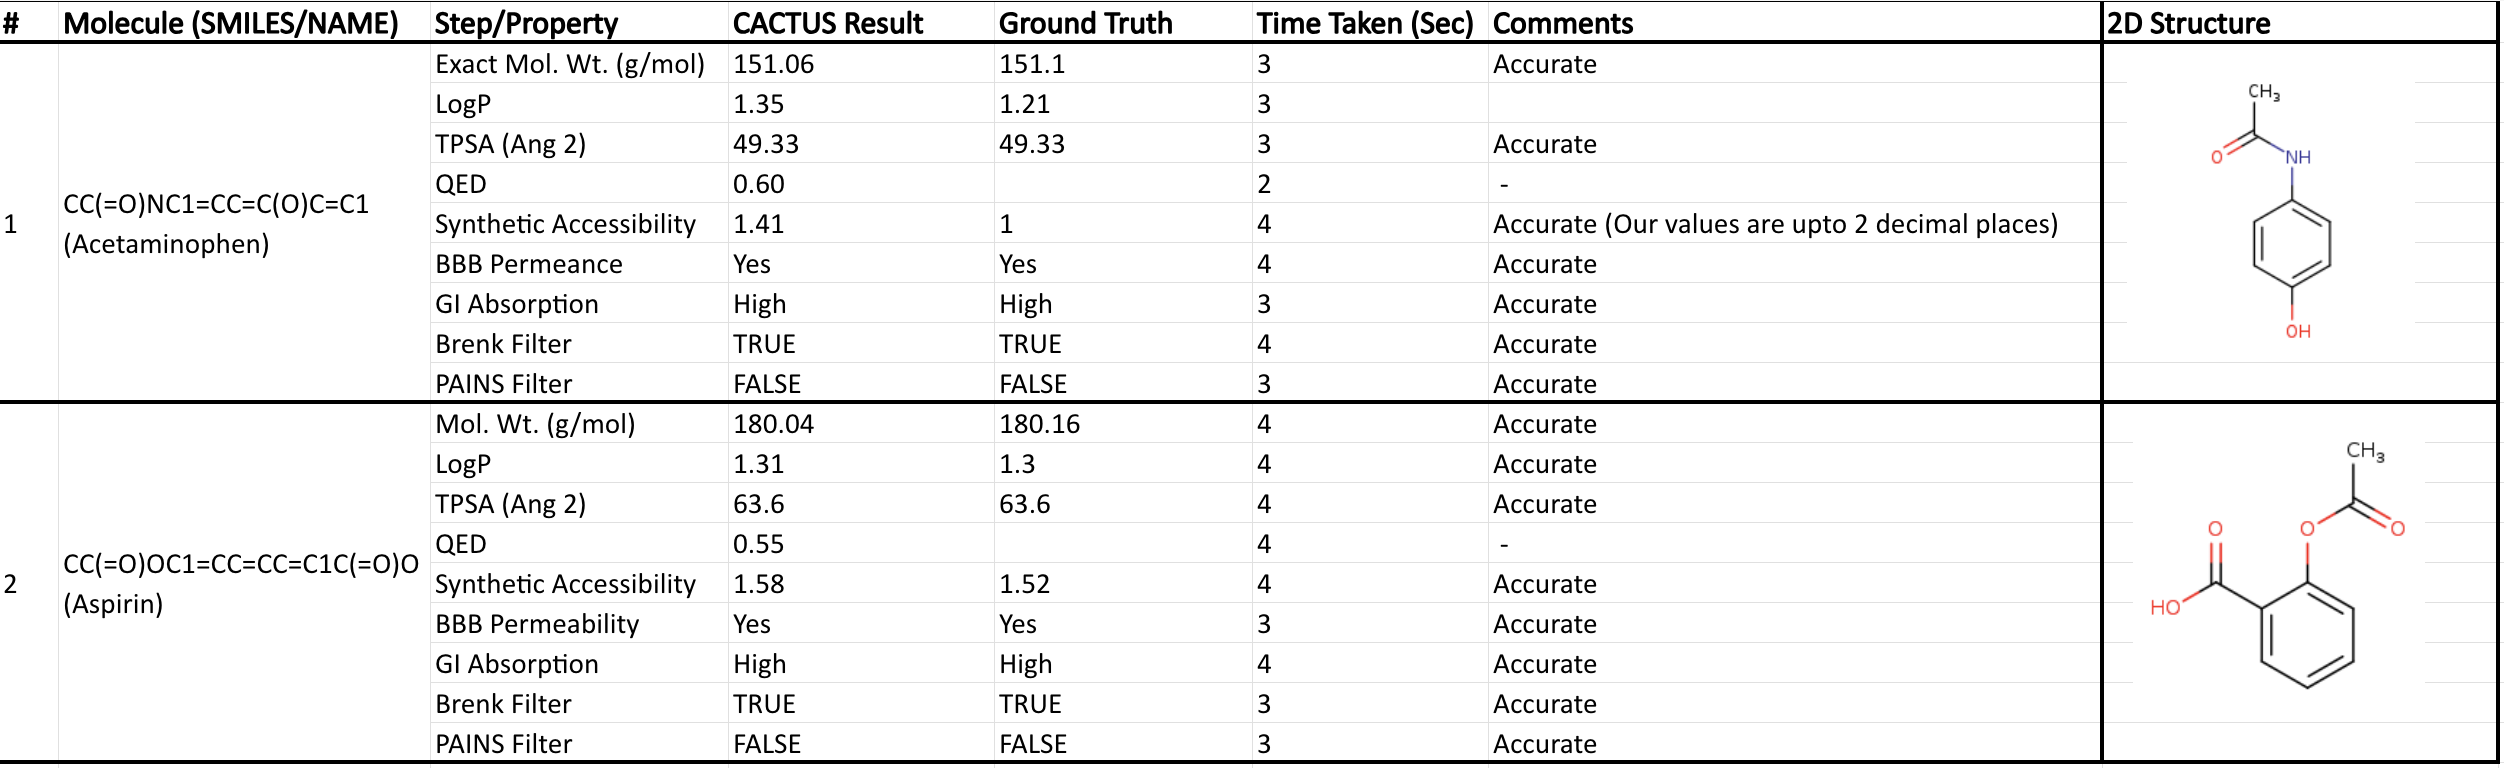

## Let's choose some other molecules

Use any of the following SMILES to ask chemistry related questions!

Common Medications
* 0.) Aspirin (Acetylsalicylic Acid)
  *  Structure: C9H8O4
  *  Uses: Pain reliever, anti-inflammatory.
  * SMILES: CC(=O)OC1=CC=CC=C1C(=O)O
* 1.) Ibuprofen
  * Structure: C13H18O2
  * Uses: Nonsteroidal anti-inflammatory drug (NSAID).
  * SMILES: CC(C)CC1=CC=C(C=C1)C(C)C(=O)O
* 2.) Paracetamol (Acetaminophen)
  * Structure: C8H9NO2
  * Uses: Pain reliever, fever reducer.
  * SMILES: CC(=O)NC1=CC=C(O)C=C1

Organic Dye Sensors
* 3.) Fluorescein
  * Structure: C20H12O5
  * Uses: Dye for fluorescence microscopy.
  * SMILES: C1=CC=C2C(=C1)C3=CC=CC=C3OC4=C2C=CC(=C4)C(=O)O
* 4.) Rhodamine B
  * Structure: C28H31ClN2O3
  * Uses: Dye for fluorescence applications.
  * SMILES: C1=CC=C2C(=C1)C=C(C(=C2)C3=CC4=C(C=C3)N(C=C4)C)C(=O)O
* 5.) Methylene Blue
  * Structure: C16H18ClN3S
  * Uses: Staining agent in biology.
  * SMILES: CN(C)C1=NC2=C(SC=C2)C=C1C3=CC=CC=C3.Cl


In [ ]:
SMILES = {0: 'CC(=O)OC1=CC=CC=C1C(=O)O',
       1:'CC(C)CC1=CC=C(C=C1)C(C)C(=O)O',
       2:'CC(=O)NC1=CC=C(O)C=C1',
       3:'C1=CC=C2C(=C1)C3=CC=CC=C3OC4=C2C=CC(=C4)C(=O)O',
       4:'C1=CC=C2C(=C1)C=C(C(=C2)C3=CC4=C(C=C3)N(C=C4)C)C(=O)O',
       5:'CN(C)C1=NC2=C(SC=C2)C=C1C3=CC=CC=C3.Cl'}

The SMILES from the above list have been put in a convenient dictionary indexed by number. Enter the SMILES[ ] space below (A number between 0-5)

In [ ]:
Model.run("What is the synthetic accessibility of the smiles: "+ SMILES[0])



> Entering new AgentExecutor chain...
Thought: I need to use the tool CalculateSA
Action: CalculateSA
Action Input: CC(=O)OC1=CC=CC=C1C(=O)O
Observation: 1.580039750008826
Thought:I now know the final answer
Final Answer: The synthetic accessibility of CC(=O)OC1=CC=CC=C1C(=O)O is 1.580039750008826

> Finished chain.


'The synthetic accessibility of CC(=O)OC1=CC=CC=C1C(=O)O is 1.580039750008826'

## Let's test some other questions!

In [ ]:
quantitative = {
    0: 'What is the Molecular Weight ',
    1: 'What is the QED ',
    2: 'What is the Synthetic Accessibility ',
    3: 'What is the Total Polar Surface Area ',
    4: 'What is the LogP '
}

A dictionary of quantitave questions is created above. Similarily to the SMILES, reference with a number between 0 and 4.

In [ ]:
Model.run(quantitative[0]+"of the smiles: "+ SMILES[1])



> Entering new AgentExecutor chain...
Thought: I need to use the tool CalculateMolecularWeight
Action: CalculateMolecularWeight
Action Input: CC(C)CC1=CC=C(C=C1)C(C)C(=O)O
Observation: 206.130679816
Thought:I now know the final answer
Final Answer: The Molecular Weight of CC(C)CC1=CC=C(C=C1)C(C)C(=O)O is 206.130679816

> Finished chain.


'The Molecular Weight of CC(C)CC1=CC=C(C=C1)C(C)C(=O)O is 206.130679816'

Some additional qualitative questions

In [ ]:
Model.run("Does the smiles: "+ SMILES[0]+" pass the blood brain barrier?")



> Entering new AgentExecutor chain...
Thought: I need to use the tool CalculateBBBPermeant
Action: CalculateBBBPermeant
Action Input: CC(=O)OC1=CC=CC=C1C(=O)O
Observation: Yes
Thought:I now know the final answer
Final Answer: Yes

> Finished chain.


'Yes'

In [ ]:
Model.run("Does the smiles: "+ SMILES[0]+" pass gastrointestinal absorption?")



> Entering new AgentExecutor chain...
Thought: I need to use the tool calculate_gi_absorption
Action: calculate_gi_absorption
Action Input: CC(=O)OC1=CC=CC=C1C(=O)O
Observation: High
Thought:I now know the final answer
Final Answer: Yes

> Finished chain.


'Yes'

In [ ]:
Model.run("Does the smiles: "+ SMILES[0]+" trigger the brenk filter?")



> Entering new AgentExecutor chain...
Thought: I need to use the tool BrenkFilter
Action: BrenkFilter
Action Input: CC(=O)OC1=CC=CC=C1C(=O)O
Observation: True
Thought:I now know the final answer
Final Answer: Yes

> Finished chain.


'Yes'

In [ ]:
Model.run("Does the smiles: "+ SMILES[0]+" trigger the PAINS filter?")



> Entering new AgentExecutor chain...
Thought: I need to use the tool PainsFilter
Action: PainsFilter
Action Input: CC(=O)OC1=CC=CC=C1C(=O)O
Observation: False
Thought:I now know the final answer
Final Answer: The SMILES string does not trigger the PAINS filter

> Finished chain.


'The SMILES string does not trigger the PAINS filter'

## Further Performance Testing

Cactus can handle more advanced questions, such as solving for multiple properties at once and mixing quantitative and qualitative questions.

In [4]:
Model.run("What is the molecular weight and logP of the smiles CC(=O)OC1=CC=CC=C1C(=O)O? Does it trigger the Brenk filter? Does it pass the blood brain barrier?")



> Entering new AgentExecutor chain...
Thought: I need to use the tool CalculateMolecularWeight
Action: CalculateMolecularWeight
Action Input: CC(=O)OC1=CC=CC=C1C(=O)O
Observation: 180.042258736
Thought:I need to use the tool CalculateLogP
Action: CalculateLogP
Action Input: CC(=O)OC1=CC=CC=C1C(=O)O
Observation: 1.3101
Thought:I need to use the tool BrenkFilter
Action: BrenkFilter
Action Input: CC(=O)OC1=CC=CC=C1C(=O)O
Observation: True
Thought:I need to use the tool CalculateBBBPermeant
Action: CalculateBBBPermeant
Action Input: CC(=O)OC1=CC=CC=C1C(=O)O
Observation: Yes
Thought:I now know the final answer
Final Answer: The molecular weight of CC(=O)OC1=CC=CC=C1C(=O)O is 180.042258736, the logP is 1.3101, it triggers the Brenk filter, and it passes the blood brain barrier.

> Finished chain.


'The molecular weight of CC(=O)OC1=CC=CC=C1C(=O)O is 180.042258736, the logP is 1.3101, it triggers the Brenk filter, and it passes the blood brain barrier.'

Here is a table of CACTUS output for molecules generated by another model and currently unknown to publication.

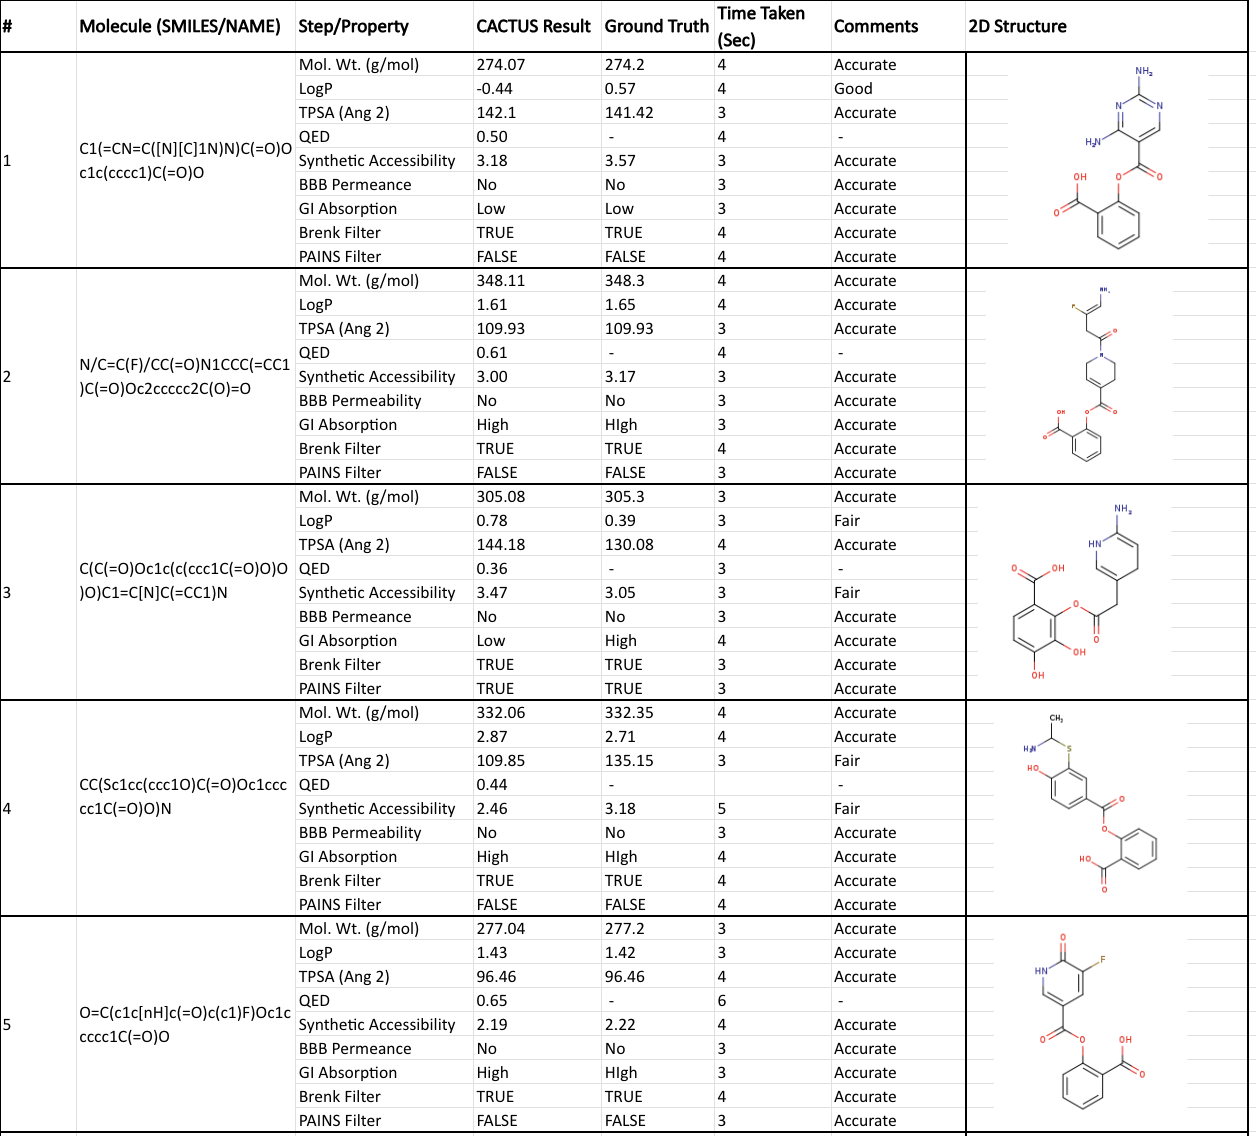

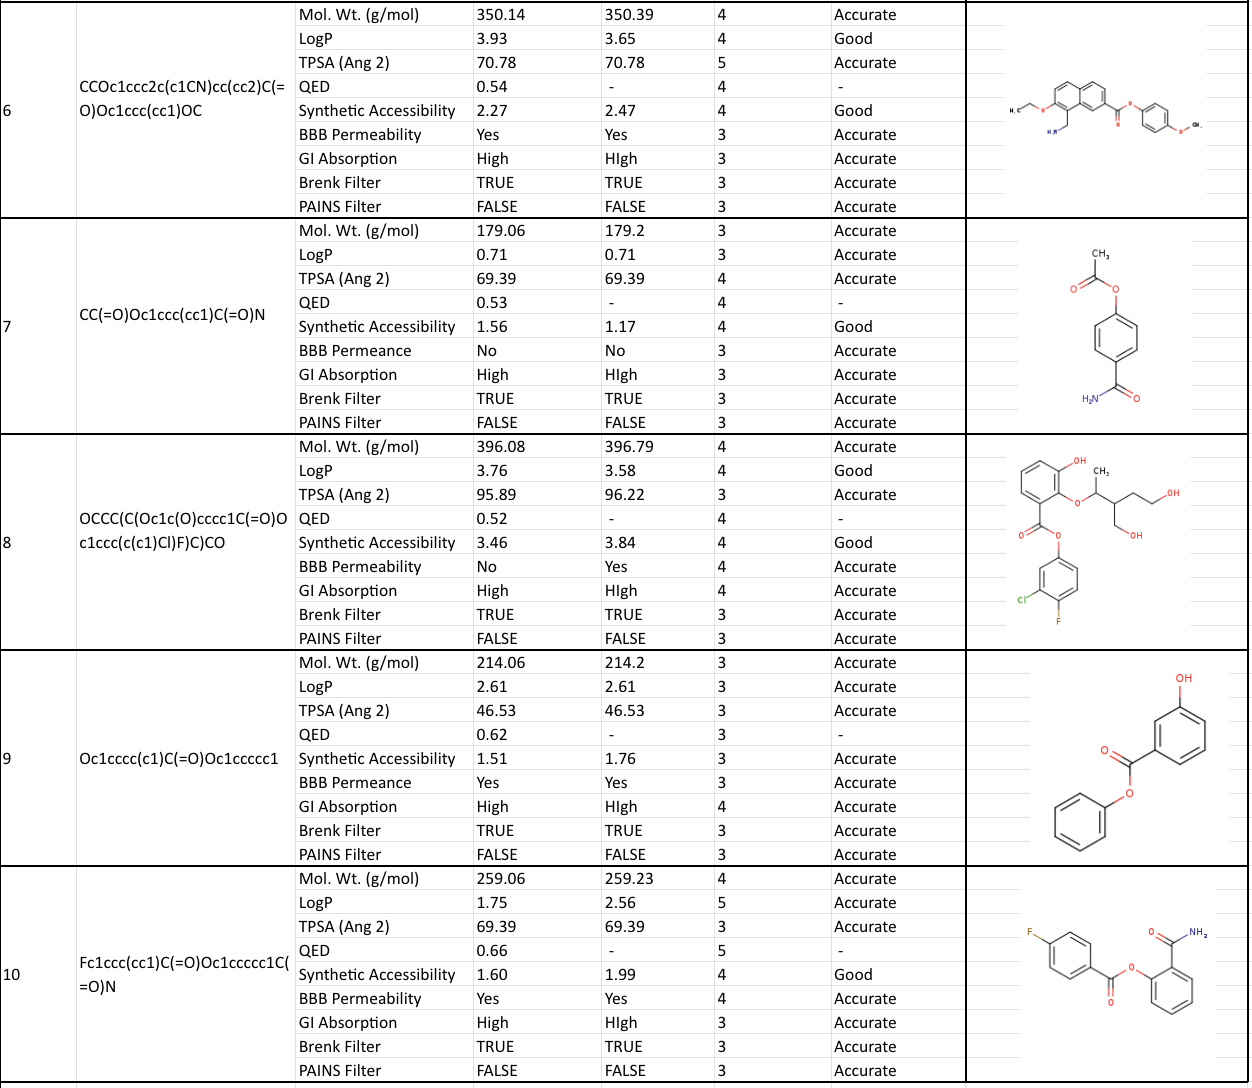

## T4 and VLLM

In [ ]:
from langchain.llms import VLLM

llm = VLLM(
        model="google/gemma-2b",
        trust_remote_code=True,  # For HF Models
        temperature=0,
        dtype="float16"
    )

WARNING 06-14 00:24:14 config.py:1218] Casting torch.bfloat16 to torch.float16.
INFO 06-14 00:24:14 llm_engine.py:161] Initializing an LLM engine (v0.5.0) with config: model='google/gemma-2b', speculative_config=None, tokenizer='google/gemma-2b', skip_tokenizer_init=False, tokenizer_mode=auto, revision=None, rope_scaling=None, rope_theta=None, tokenizer_revision=None, trust_remote_code=True, dtype=torch.float16, max_seq_len=8192, download_dir=None, load_format=LoadFormat.AUTO, tensor_parallel_size=1, disable_custom_all_reduce=False, quantization=None, enforce_eager=False, kv_cache_dtype=auto, quantization_param_path=None, device_config=cuda, decoding_config=DecodingConfig(guided_decoding_backend='outlines'), seed=0, served_model_name=google/gemma-2b)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


INFO 06-14 00:24:15 selector.py:119] Cannot use FlashAttention-2 backend for Volta and Turing GPUs.
INFO 06-14 00:24:15 selector.py:50] Using XFormers backend.
INFO 06-14 00:24:16 selector.py:119] Cannot use FlashAttention-2 backend for Volta and Turing GPUs.
INFO 06-14 00:24:16 selector.py:50] Using XFormers backend.
INFO 06-14 00:24:16 weight_utils.py:218] Using model weights format ['*.safetensors']


model-00002-of-00002.safetensors:   0%|          | 0.00/67.1M [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.95G [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/13.5k [00:00<?, ?B/s]

INFO 06-14 00:25:31 model_runner.py:159] Loading model weights took 4.6681 GB
INFO 06-14 00:25:34 gpu_executor.py:83] # GPU blocks: 29275, # CPU blocks: 14563
INFO 06-14 00:25:38 model_runner.py:878] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 06-14 00:25:38 model_runner.py:882] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` or enforcing eager mode. You can also reduce the `max_num_seqs` as needed to decrease memory usage.
INFO 06-14 00:26:10 model_runner.py:954] Graph capturing finished in 32 secs.


In [ ]:
Model = Cactus(model_name="google/gemma-2b", model_type="vllm", dtype="float16")
Model.run("What is the molecular weight of the smiles: OCC1OC(O)C(C(C1O)O)O")

TypeError: Cactus.__init__() got an unexpected keyword argument 'dtype'

## Fun with prompt engineering!

In [ ]:
Model.agent_executor.agent.llm_chain.prompt.template

'<<SYS>>\n\nYou are a helpful chemistry assistant. By following the RULES below you will be able to assist the user by leveraging informatics tools to obtain answers.\n\nRULES:\n1. Input to tools must be a single SMILES string, no additional text or formatting.\n2. Read carefully what the question is asking. Only calculate the necessary information.\n3. You must use the tools to obtain your answer, do not pull information out of nowhere.\n4. Only answer the question asked, do not make up your own question.\n5. When applicable, provide units to the values returned by the tools.\n6. Closely follow the format instructions below.\n<</SYS>>\nAVAILABLE_TOOLS:\n\nCalculateMolecularWeight - \nUse this tool when you need to calculate the molecular weight of a SMILES string. Units in Dalton.\n\nCalculateQED - Compute Quantitative Estimate of Druglikeness (QED) of the given molecule\nBrenkFilter - \nUsed when you need to calculate whether a molecule triggers the Brenk Filter.\n\nCalculateTPSA - C

**Double click the text box to edit the current prompt! When ready, copy everything between the triple quotes and paste to the """This is a new prompt!""" code section below. This maintains the proper format**


```
<<SYS>>
You are a helpful chemistry assistant. By following the RULES below you will be able to assist the user by leveraging informatics tools to obtain answers.

RULES:
1. Input to tools must be a single SMILES string, no additional text or formatting.
2. Read carefully what the question is asking. Only calculate the necessary information.
3. You must use the tools to obtain your answer, do not pull information out of nowhere.
4. Only answer the question asked, do not make up your own question.
5. When applicable, provide units to the values returned by the tools.
6. Closely follow the format instructions below.
<</SYS>>
AVAILABLE_TOOLS:

CalculateMolecularWeight -
Use this tool when you need to calculate the molecular weight of a SMILES string. Units in Dalton.

CalculateQED - Compute Quantitative Estimate of Druglikeness (QED) of the given molecule
BrenkFilter -
Used when you need to calculate whether a molecule triggers the Brenk Filter.

CalculateTPSA - Compute the Topological polar surface area (TPSA) of the given molecule.
CalculateBBBPermeant - calculates the Blood Brain Barrier Permeability of the compound
calculate_druglikeness - calculates the druglikeness of the compound with regards to Lipinski's rule of 5
calculate_gi_absorption - returns whether the gastrointestinal absorption is high or low
CalculateLogP -
Use this tool when you need to calculate the log of the partition coefficient (LogP) of a compound.

PainsFilter -
Used when you need to calculate whether a molecule triggers the Pains Filter.

CalculateSA - Used to compute the synthetic accessibility (SA) of the given molecule.


To use a tool, please use the following format:
'''
Question: The input question you must answer
Thought: Do I need to use a tool?
Action: the action to take, should be exactly one of [CalculateMolecularWeight, CalculateQED, BrenkFilter, CalculateTPSA, CalculateBBBPermeant, calculate_druglikeness, calculate_gi_absorption, CalculateLogP, PainsFilter, CalculateSA] with no additional text
Action Input: the input to the action
Observation: the result of the action
... (this Thought/Action/Action Input/Observation can repeat N times)
Thought: I now know the final answer
Final Answer: the final answer to the original input question
'''
Once a Final Answer has been determined, you may respond. Do not generate a new Question to ask.

Here is a specific example:
'''
Question: What is the molecular weight of the smiles: CCO ?"
Thought: I need to use the tool CalculateMolecularWeight
Action: CalculateMolecularWeight
Action Input: CCO
Observation: 34.0
Thought: I now know the final answer
Final Answer: The molecular weight of CCO is 34.0
'''



Remember: Your role is to facilitate accurate answers through effective tool usage. Maintain a strict reliance on tool outputs to ensure the reliability and trustworthiness of your responses. Once you have an Observation that answers the question, that is your Final Answer.
Question: {input}
{agent_scratchpad}
```



In [ ]:
# To make changes to the prompt just overwrite the resulting string
Model.agent_executor.agent.llm_chain.prompt.template = """This is a new prompt!"""

In [ ]:
Model = Cactus(model_name="gemini-pro", model_type="api")
Model.run("What is the molecular weight of the smiles: OCC1OC(O)C(C(C1O)O)O")